<a href="https://colab.research.google.com/github/Neeharika8106/Smartproctor123/blob/master/Copy_of_Copy_of_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('sentiment_tweets3.csv')


In [ ]:
data

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [ ]:
data['message to examine'][10310]


"What do you do when depression succumbs the brain and makes you feel like you'll never be enough?"

In [ ]:
# REVIEW THE DATA

data.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
# RENAMING COLUMNS

data = data.rename(columns = {"message to examine":"Text", "label (depression result)" :"Category" })


In [ ]:
data.dtypes

Index        int64
Text        object
Category     int64
dtype: object

In [ ]:
# KEEPING ONLY THE 2 NECESSARY COLUMNS

data = data[["Text", "Category"]]


In [ ]:
# REVIEW DATA AFTER CHANGES

data.head(5)

,Text,Category
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
# CHECK THE SHAPE OF THE DATA

data.shape

(10314, 2)

In [ ]:
# CHECK INFO REGARDING IT

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10314 non-null  object
 1   Category  10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [ ]:
# CHECK IF THERE ARE NULL VALUES

data.isnull().sum()

Text        0
Category    0
dtype: int64

In [ ]:
# REMOVING DUPLICATE VALUES

data = data.drop_duplicates()


In [ ]:
data.shape

(10283, 2)

In [ ]:
# CHECKING ALL CATEGORIES

data["Category"].unique()

array([0, 1])

In [ ]:
# RENAMING COLUMNS TO MAKE UNDERSTANDING OF EXPLORATION RESULTS EASIER

data['Category'] = data['Category'].replace(0,'Not Depressed')
data['Category'] = data['Category'].replace(1,'Depressed')


In [ ]:
# CHECKING NO. OF CATEGORIES

data["Category"].value_counts()

Not Depressed    7996
Depressed        2287
Name: Category, dtype: int64

Text(0.5, 1.0, 'COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT')

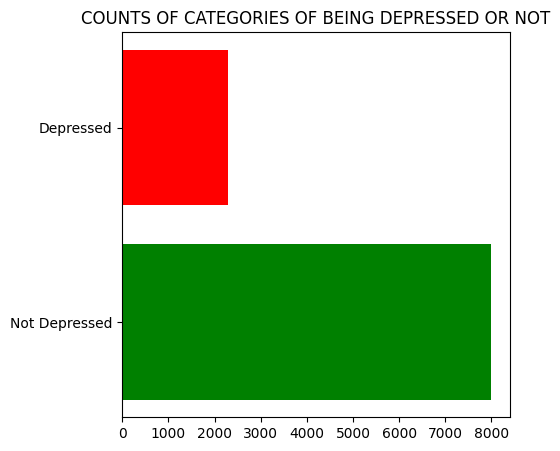

In [ ]:
# CHECKING COUNTS OF CATEGORIES

fig = plt.figure(figsize =(5,5))
plt.barh(data["Category"].unique(), data["Category"].value_counts(),
         color =['green', 'red'])
plt.title("COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT")


In [ ]:
# CREATING WORDCLOUD TO CHECK MOST OCCURING WORDS IN PREPROCESSED DATA

from wordcloud import WordCloud, STOPWORDS
text = data['Text'].values
print(text)


['just had a real good moment. i missssssssss him so much, '
 'is reading manga  http://plurk.com/p/mzp1e'
 '@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8 '
 ...
 'Ketamine Nasal Spray Shows Promise Against Depression, Suicide #health https://cmun.it/4sjligkÂ\xa0'
 "dont mistake a bad day with depression! everyone has 'em!" '0']


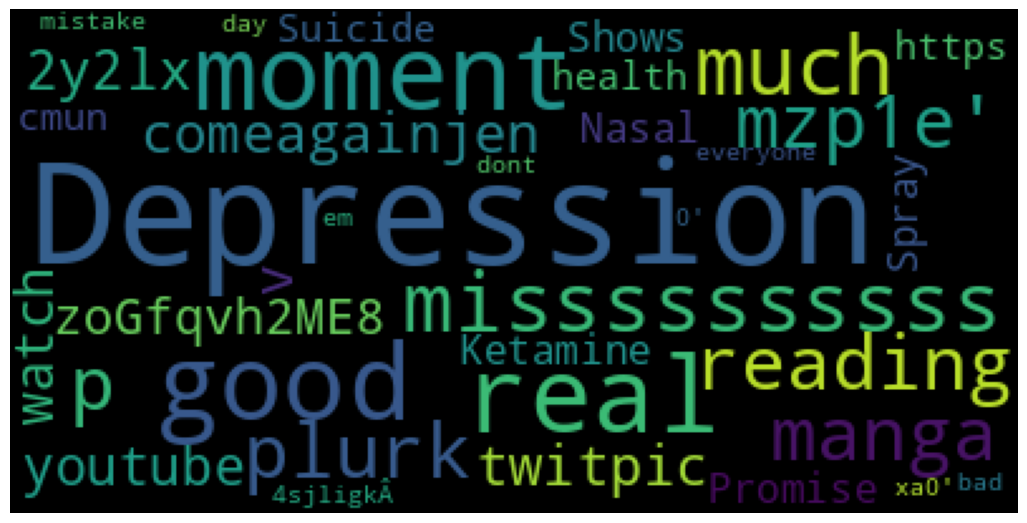

In [ ]:
wordcloud = WordCloud().generate(str(text))
plt.figure(figsize = (13,13), facecolor = None)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# RENAMING COLUMNS BACK TO INITIAL ENCODED NUMBERS AS EXPLORATION IS OVER AND WE SHALL NEED ENCODED NUMBERS FOR FURTHER ANALYSIS

data['Category'] = data['Category'].replace('Not Depressed', 0)
data['Category'] = data['Category'].replace('Depressed', 1)


**Text preprossing**

In [ ]:
# INSTALLING TEXTACY LIBRARY FOR PREPROCESSING

%pip install textacy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 105.5 MB/s eta 0:00:00


In [ ]:
# IMPORT OTHER TEXT PREPROCESSING LIBRARIES

import nltk
nltk.download('stopwords')
nltk.download('punkt')     #provides petrained tokenizer
nltk.download('wordnet')   #is lexical DB for lemmatization:converting word to roots form.
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from textacy import preprocessing


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# SHUFFLING OUR DATASET SINCE IT IS IS UNSHUFFLED AND FIRST 8000 ROWS BELONGED TO A CERTAIN CATEGORY

data = data.sample(frac=1)


In [ ]:
data.head()

,Text,Category
2925,@AndreaGillies Take plenty of bottled water,0
6930,PAHA! I've been having fun today. ;) Apart f...,0
5210,Sleepyyyyyyyyyyyyyy but rain got meee thinking...,0
4666,@Trialsinner pinky swear,0
8676,@joyous Ahhhh @daluckyme ....depression is a v...,1


In [ ]:
# CONVERTING TEXT TO LOWER CASE

data["Text"] = data["Text"].str.lower()


In [ ]:
# REMOVING THE STOPWORDS

stop = stopwords.words('english')
print(stop)
data["Text"] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# REMOVING PUNCTUATION, EXTRA WHITESPACES AND HASHTAGS

preprocess = preprocessing.make_pipeline(
    preprocessing.remove.punctuation,    #(. , ? "" ' : ; -)
    preprocessing.normalize.whitespace,
    preprocessing.replace.hashtags,      #ex 'I love #nature and #hiking'---> 'I love nature and hiking'
)

data["Text"] = data["Text"].apply(preprocess)


In [ ]:
data.head()

,Text,Category
2925,andreagillies take plenty bottled water,0
6930,paha i ve fun today apart feet cold hurt gt co...,0
5210,sleepyyyyyyyyyyyyyy rain got meee thinkingggggg,0
4666,trialsinner pinky swear,0
8676,joyous ahhhh daluckyme depression bad silent k...,1


In [ ]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# STEMMING THE WORDS

from nltk.stem.snowball import SnowballStemmer  #used to stem words in various languages(Frech,english,Spanish,german...)
stemmer = SnowballStemmer("english")
data['Text'] = data['Text'].apply(lambda x: stemmer.stem(x))


In [ ]:
# REVIEW THE DATA AFTER TEXT PREPROCESSING

data.head()

,Text,Category
2925,andreagillies take plenty bottled wat,0
6930,paha i ve fun today apart feet cold hurt gt co...,0
5210,sleepyyyyyyyyyyyyyy rain got meee thinkingggggg,0
4666,trialsinner pinky swear,0
8676,joyous ahhhh daluckyme depression bad silent kil,1


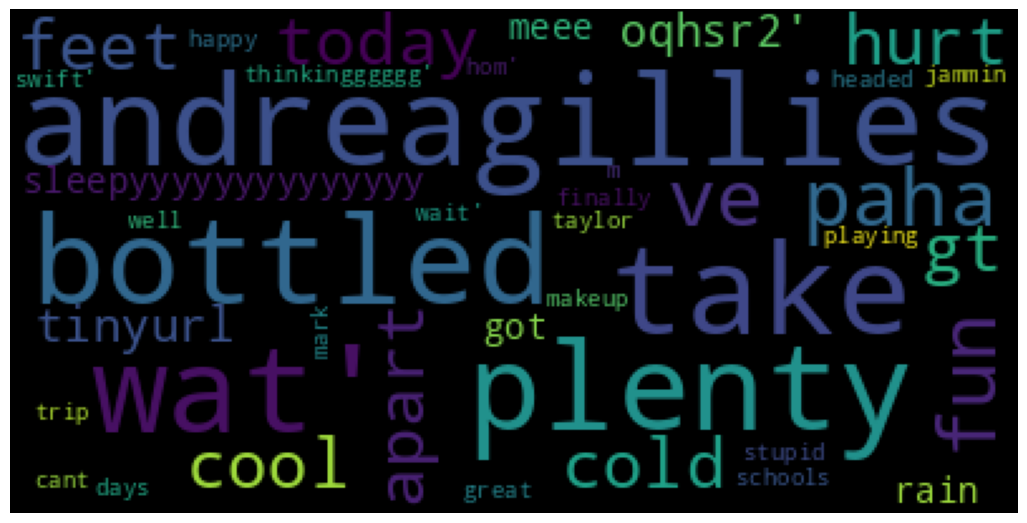

In [ ]:
# CREATING WORDCLOUD TO SEE MOST OCCURING WORDS AFTER PREPROCESSING

TEXT_AFTER_PREPROCESS = data['Text'].values

wordcloud = WordCloud().generate(str(TEXT_AFTER_PREPROCESS))
plt.figure(figsize = (13,13), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


**Text Vectorization**

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT TF-IDF ALGORITHM:transform a set of text documents into a matrix representation

from sklearn.feature_extraction.text import TfidfVectorizer  #TF-IDF is a commonly used numerical statistic,
                                                             #that reflects the importance of a word in a document within a collection


In [ ]:
# CREATING CORPUS OF OUR WORDS
corpus = data['Text'].tolist()
print("Corpus:",corpus)

# PRINTING NO. OF WORDS OF OUR CORPUS
print("Total no. of words in our corpus are:", len(corpus),'\n')


Corpus: ['andreagillies take plenty bottled wat', 'paha i ve fun today apart feet cold hurt gt cool http tinyurl com oqhsr2', 'sleepyyyyyyyyyyyyyy rain got meee thinkingggggg', 'trialsinner pinky swear', 'joyous ahhhh daluckyme depression bad silent kil', 'studio day day', 'blessyounom yes get depression team los', 'day age i ve miss', 'wifey still asleep', 'whatcaitlindid long time twitter monday busy could help revise maths as good teacher all xoxo', 'packing ready early flight tomorrow morning america com', 'camera today sorri', 'rantsandraves re hate people that thank laugh http chilp it 482237', 'decided try something different lavender toe nail polish 1st look different 2nd hmm bad 3rd good choice lori', 'got back skating hanging jam', 'thinkin maybe mojitos order evening gotta make use mint i m growing right', 'http tr im mux9 ï ½ denius belong telmo remix', '2 shots goose good go', 'got hey monday shirt', 'iaci tare deja sunt 10 gata s rezolve deschid i eu licita ie pt bin pack

In [ ]:
# FITTING VECTORIZER TO OUR DATA:During the fitting process, the TfidfVectorizer
#analyzes the corpus to learn the vocabulary and calculates the TF-IDF weights for each word in the corpus.

vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)


TfidfVectorizer()

In [ ]:
# TRANSFORMING OUR DATA

Text_tf = vectorizer.transform(data['Text']).toarray()
print(Text_tf)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# GETTING TOP 5 WORDS WITH HIGHEST TF-IDF SCORES

feature_array = np.array(vectorizer.get_feature_names_out())
tfidf_sorting = np.argsort(Text_tf).flatten()[::-1]

n = 5
top_n = feature_array[tfidf_sorting][:n]
print("The 5 most important words are", top_n, '\n')

# GETTING WORDS WITH THE LEAST TF-IDF SCORES

bottom_n = feature_array[tfidf_sorting][-n:]
print(" The 5 least important words having lowest tf-idf scores are", bottom_n)
print('\n')


The 5 most important words are ['jammin' 'makeup' 'swift' 'taylor' 'mark'] 

 The 5 least important words having lowest tf-idf scores are ['parsing' 'part' 'partayyyi' 'parti' '00']




In [ ]:
# REVIEW ONE OF THE VECTORIZED SENTENCE

Text_tf[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# RECHEKING LENGTH OF OUR VECTORIZED ARRAY

print("Length of our vectorized array is:",len(Text_tf), "\n")

Length of our vectorized array is: 10283 




 Our TF-IDF Vector in 2-D Looks like: 



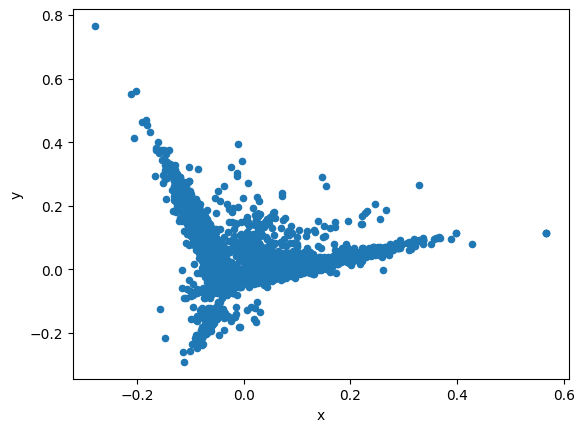

In [ ]:
# VISUALIZING OUR TF-IDF VECTOR IN 2-D USING PCA
from sklearn.decomposition import PCA
%matplotlib inline

pca = PCA(n_components=2)


df2d = pd.DataFrame(pca.fit_transform(Text_tf), columns=list('xy'))

print('\n', "Our TF-IDF Vector in 2-D Looks like:",'\n')

# Plot the scatter plot with colors
df2d.plot(kind='scatter', x='x', y='y')
plt.show()


In [ ]:
# SPLITTING OUR VECTORIZED ARRAY TO TRAINING AND TESTING USING THE 80-20 RULE

x_train = Text_tf[:8000]
x_test = Text_tf[8000:]


In [ ]:
# SPLITTING OUR DEPENDENT VARIABLE INTO TRAINING AND TESTING

y_train = data["Category"].iloc[:8000]
y_test = data["Category"].iloc[8000:]


**FITTING OUR MACHINE LEARNING MODELS**

In [ ]:
# IMPORTING TIME LIBRARY TO PRINT THE TIME TAKEN TO TRAIN AND PREDICT WITH THE MODEL

from time import time


**1) FITTING A MULTIPLE LOGISTIC REGRESSION MODEL**

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression


In [ ]:
# FITTING THE MODEL

lr_t0 = time() # Record the current time before fitting the model

lgr = LogisticRegression()
lgr.fit(x_train, y_train)

print("Training Time of the Logistic Regression Model:", round(time()-lr_t0, 3), "seconds",'\n')


Training Time of the Logistic Regression Model: 3.453 seconds 



In [ ]:
import joblib

joblib.dump(lgr, 'D:\sentiment_analysis\logistic_regression_model.pkl')


['D:\\sentiment_analysis\\logistic_regression_model.pkl']

In [ ]:
# PREDICTING WITH THE MODEL
#predict method takes the TF-IDF vectors of the testing data (x_test) as input and returns the predicted category labels.

lr_t1 = time()

y_pred_lgr = lgr.predict(x_test)

print("Time taken to make predictions for the Logistic Regression Model:", round(time()-lr_t1, 3), "seconds",'\n')


Time taken to make predictions for the Logistic Regression Model: 0.023 seconds 



**2) FITTING A DECISION TREE CLASSIFIER**

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier


In [ ]:
# FITTING THE MODEL

dt_t0=time()

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print("Training Time of the Decision Tree Model:", round(time()-dt_t0, 3), "seconds", '\n')


Training Time of the Decision Tree Model: 29.939 seconds 



In [ ]:
## Save the trained model
import joblib
joblib.dump(dt, 'D:\sentiment_analysis\Decision_tree_model.pkl')


['D:\\sentiment_analysis\\Decision_tree_model.pkl']

In [ ]:
# PRINTING MAX DEPTH OF OUR DECISION TREE MODEL
# length of the longest path from the root node to any leaf node in the decision tree.

dt_depth = dt.tree_.max_depth
print("Max depth of our Decision Tree Model is:", dt_depth)
print('\n')


Max depth of our Decision Tree Model is: 632




In [ ]:
# PRINTING NO. OF NODES OF OUR DECISION TREE MODEL

dt_nodes = dt.tree_.node_count
print("No. of nodes of our Decision Tree Model is:", dt_nodes)
print('\n')

No. of nodes of our Decision Tree Model is: 1265




In [ ]:
# PREDICTING WITH THE MODEL

dt_t1=time()

y_pred_dt = dt.predict(x_test)

print("Time taken to make predictions for the Decision Tree Model:", round(time()-dt_t1, 3), "seconds",'\n')


Time taken to make predictions for the Decision Tree Model: 0.057 seconds 



**3) FITTING A RANDOM FORESTS CLASSIFIER**

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT RANDOM FORESTS CLASSIFIER

from sklearn.ensemble import RandomForestClassifier


In [ ]:
# FITTING THE MODEL

rf_t0=time()

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

print("Training Time of the Random Forest Model:", round(time()-rf_t0, 3), "seconds", '\n')


Training Time of the Random Forest Model: 87.497 seconds 



In [ ]:
## Save the trained model
import joblib
joblib.dump(rf, 'D:\sentiment_analysis\Random_forest_model.pkl')


['D:\\sentiment_analysis\\Random_forest_model.pkl']

In [ ]:
# PRINTING MAX DEPTH OF OUR RANDOM FOREST MODEL

rf_depth = rf.estimators_[0].tree_.max_depth
print("Max depth of our Decision Tree Model is:", rf_depth)
print('\n')


Max depth of our Decision Tree Model is: 825




In [ ]:
# PRINTING NUMBER OF ESTIMATORS (DECISION TREES) USED IN BUILDING OUR RNADOM FOREST MODEL

n_nodes = rf.estimators_
print("No. of estimators (decision trees) used for building our Random Forest model are:",len(n_nodes))
print("\n")

No. of estimators (decision trees) used for building our Random Forest model are: 100




In [ ]:
# PREDICTING WITH THE MODEL

rf_t1 = time()

y_pred_rf = rf.predict(x_test)

print("Time taken to make predictions for the Random Forest Model:", round(time()-rf_t1, 3), "seconds", '\n')


Time taken to make predictions for the Random Forest Model: 0.495 seconds 



**4) FITTING A Naive Bayes (MultinomialNB) classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
# FITTING THE MODEL

nb_t0=time()

nb = MultinomialNB()
nb.fit(x_train, y_train)
print("Training Time of the Naive bayes Model:", round(time()-nb_t0, 3), "seconds", '\n')


Training Time of the Naive bayes Model: 0.211 seconds 



In [ ]:
## Save the trained model
import joblib

joblib.dump(nb, 'D:\sentiment_analysis\_naive_bayes_model.pkl')


['D:\\sentiment_analysis\\_naive_bayes_model.pkl']

In [ ]:
# PREDICTING WITH THE MODEL

nb_t1 = time()

y_pred_nb = nb.predict(x_test)

print("Time taken to make predictions for the Naive Bayes Model:", round(time()-nb_t1, 3), "seconds", '\n')


Time taken to make predictions for the Naive Bayes Model: 0.073 seconds 



**5) FITTING A SVM model**

In [ ]:
# FITTING THE MODEL
from sklearn.svm import SVC

svm_t0 = time()

svm = SVC()
svm.fit(x_train, y_train)

print("Training Time of the SVM Model:", round(time()-svm_t0, 3), "seconds", '\n')


Training Time of the SVM Model: 318.086 seconds 



In [ ]:
## Save the trained model
import joblib
joblib.dump(svm, 'D:\sentiment_analysis\SVM_model.pkl')


['D:\\sentiment_analysis\\SVM_model.pkl']

In [ ]:
# PREDICTING WITH THE MODEL

svm_t1 = time()
y_pred_svm = svm.predict(x_test)
print("Time taken to make predictions for the SVM Model:", round(time()-svm_t1, 3), "seconds", '\n')


Time taken to make predictions for the SVM Model: 304.569 seconds 



**6) FITTING A Gradient Boosting model**

In [ ]:
#gradient boosting trying1
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

gbm_t0 = time()

gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train)

# Calculate training error for each boosting iteration
train_errors = []
for i, y_pred in enumerate(gbm.staged_predict(x_train)):
    train_error = gbm.loss_(y_train, y_pred)
    train_errors.append(train_error)

print("Training Time of the GBM Model:", round(time()-gbm_t0, 3), "seconds", '\n')


Training Time of the GBM Model: 441.077 seconds 



In [ ]:
## Save the trained model1
import joblib
joblib.dump(gbm, 'D:\sentiment_analysis\gradient_boosting_model.pkl')

['D:\\sentiment_analysis\\gradient_boosting_model.pkl']

In [ ]:
# PREDICTING WITH THE MODEL
gbm_t1 = time()

y_pred_gbm = gbm.predict(x_test)

print("Time taken to make predictions for the Gradient Boosting Model:", round(time()-gbm_t1, 3), "seconds", '\n')

Time taken to make predictions for the Gradient Boosting Model: 0.095 seconds 



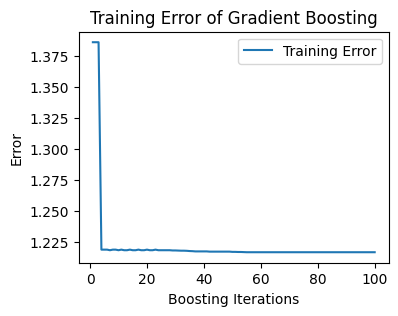

In [ ]:
# Plotting the training error with reduced size
plt.figure(figsize=(4,3))  # Adjust the figure size as desired
plt.plot(range(1, len(train_errors) + 1), train_errors, label='Training Error')
plt.xlabel('Boosting Iterations')
plt.ylabel('Error')
plt.title('Training Error of Gradient Boosting')
plt.legend()
plt.show()

**EVALUATING OUR MODELS**

In [ ]:
# IMPORTING LIBRARIES TO EVALAUTE MODELS

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

In [ ]:
# CHECKING THE ACCURACY SCORES OF MODELS

print("THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS:", "\n")
print("Accuracy Score of our Logistic Regression model is: ", accuracy_score(y_pred_lgr, y_test), "\n")
print("Accuracy Score of our Decision Tree Classifier is: ", accuracy_score(y_pred_dt, y_test), "\n")
print("Accuracy Score of our Random Forest Classifier is: ", accuracy_score(y_pred_rf, y_test), "\n")
print("Accuracy Score of our Naive bayes Classifier is: ", accuracy_score(y_pred_nb, y_test), "\n")
print("Accuracy Score of our SVM Classifier is: ", accuracy_score(y_pred_svm, y_test), "\n")
print("Accuracy Score of our Gradient Boosting Classifier  is: ", accuracy_score(y_pred_gbm, y_test), "\n")



THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS: 

Accuracy Score of our Logistic Regression model is:  0.9724047306176085 

Accuracy Score of our Decision Tree Classifier is:  0.9364870784056066 

Accuracy Score of our Random Forest Classifier is:  0.961892247043364 

Accuracy Score of our Naive bayes Classifier is:  0.9018834866403854 

Accuracy Score of our SVM Classifier is:  0.9890494962768287 

Accuracy Score of our Gradient Boosting Classifier  is:  0.9973718791064389 



Text(0.5, 0, 'Machine Learning Models')

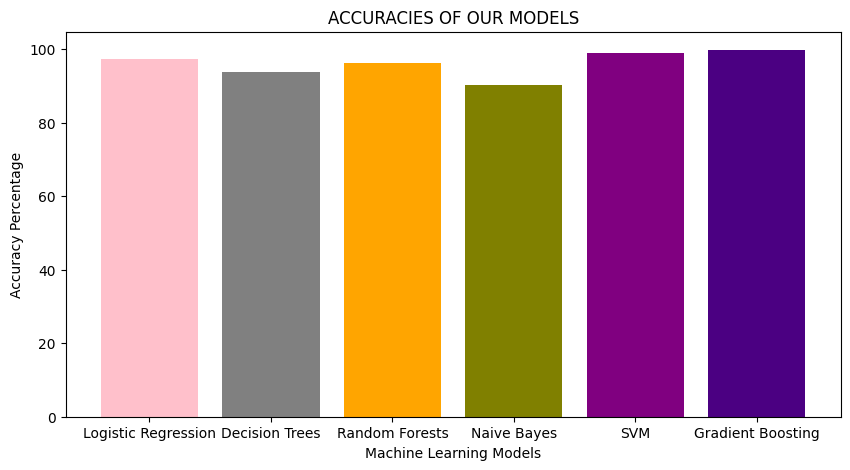

In [ ]:
# COMPARING THE ACCURACIES OF MODELS USING A BAR PLOT

plt.figure(figsize=(10,5))
plt.bar(x = ["Logistic Regression","Decision Trees", "Random Forests","Naive Bayes","SVM","Gradient Boosting"], height = [(accuracy_score(y_pred_lgr, y_test))*100, (accuracy_score(y_pred_dt, y_test))*100,(accuracy_score(y_pred_rf, y_test))*100,(accuracy_score(y_pred_nb, y_test))*100,(accuracy_score(y_pred_svm, y_test))*100,(accuracy_score(y_pred_gbm, y_test))*100 ], color = ["pink", "gray", "orange","olive","purple","indigo"])
plt.title("ACCURACIES OF OUR MODELS")

plt.ylabel("Accuracy Percentage")
plt.xlabel("Machine Learning Models")


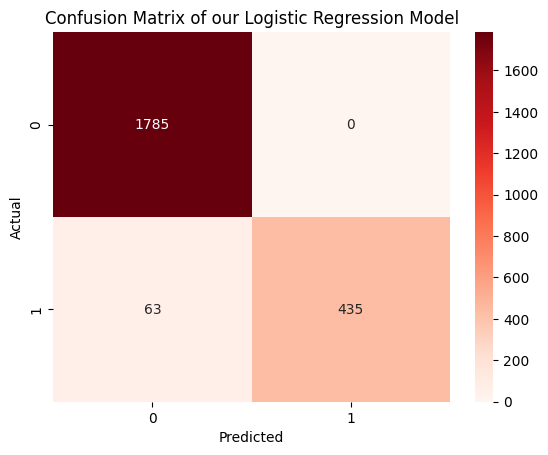

The no. of true positives are: 435 

The no. of true negatives are: 1785 

Sensitivity (True Positive Rate) : 0.8734939759036144
Specificity (True Negative Rate): 1.0


In [ ]:
# CONFUSION MATRIX FOR OUR LOGISTIC REGRESSION MODEL
import seaborn as sns
import matplotlib.pyplot as plt

confusion_lgr = confusion_matrix(y_test,y_pred_lgr)
# Create a heatmap of the confusion matrix with color mapping
sns.heatmap(confusion_lgr, annot=True, fmt='d', cmap='Reds')
# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of our Logistic Regression Model')
# Display the plot
plt.show()
print("The no. of true positives are:", confusion_lgr[1,1], "\n")
print("The no. of true negatives are:", confusion_lgr[0,0], "\n")

# Calculate true positives, true negatives, false positives, false negatives
tn = confusion_lgr[0, 0]
fp = confusion_lgr[0, 1]
fn = confusion_lgr[1, 0]
tp = confusion_lgr[1, 1]

# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

print("Sensitivity (True Positive Rate) :", sensitivity)
print("Specificity (True Negative Rate):", specificity)


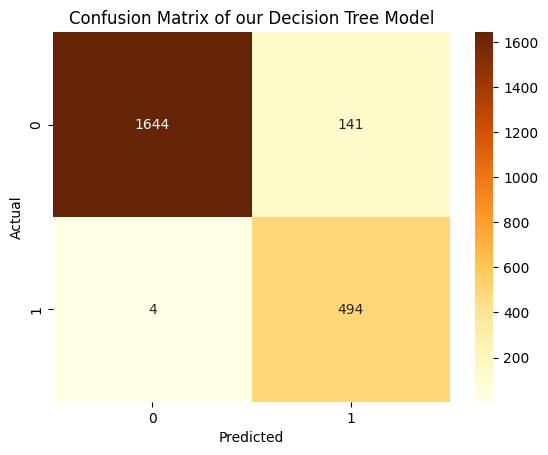

The no. of true positives are: 494 

The no. of true negatives are: 1644 

Sensitivity (True Positive Rate) : 0.9919678714859438
Specificity (True Negative Rate): 0.9210084033613445


In [ ]:
# CONFUSION MATRIX FOR OUR DECISION TREES CLASSIFIER MODEL

confusion_dt = confusion_matrix(y_test,y_pred_dt)
# Create a heatmap of the confusion matrix with color mapping
sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='YlOrBr')
# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of our Decision Tree Model')
# Display the plot
plt.show()
print("The no. of true positives are:", confusion_dt[1,1], "\n")
print("The no. of true negatives are:", confusion_dt[0,0], "\n")
# Calculate true positives, true negatives, false positives, false negatives
tn = confusion_dt[0, 0]
fp = confusion_dt[0, 1]
fn = confusion_dt[1, 0]
tp = confusion_dt[1, 1]

# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

print("Sensitivity (True Positive Rate) :", sensitivity)
print("Specificity (True Negative Rate):", specificity)


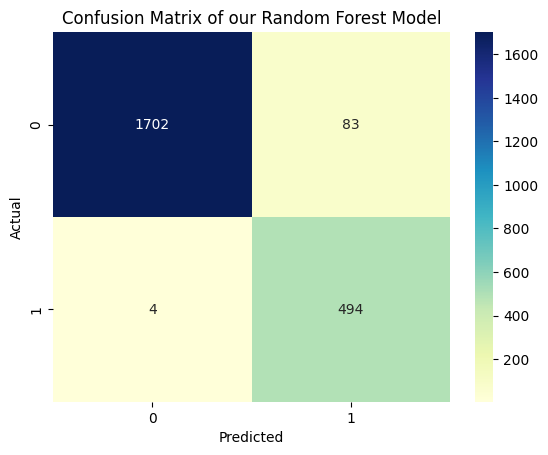

The no. of true positives are: 494 

The no. of true negatives are: 1702 

Sensitivity (True Positive Rate) : 0.9919678714859438
Specificity (True Negative Rate): 0.9535014005602241


In [ ]:
# CONFUSION MATRIX FOR OUR RANDOM FORESTS CLASSIFIER MODEL

confusion_rf = confusion_matrix(y_test,y_pred_rf)
# Create a heatmap of the confusion matrix with color mapping
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='YlGnBu')
# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of our Random Forest Model')
# Display the plot
plt.show()
print("The no. of true positives are:", confusion_rf[1,1], "\n")
print("The no. of true negatives are:", confusion_rf[0,0], "\n")
# Calculate true positives, true negatives, false positives, false negatives
tn = confusion_rf[0, 0]
fp = confusion_rf[0, 1]
fn = confusion_rf[1, 0]
tp = confusion_rf[1, 1]

# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

print("Sensitivity (True Positive Rate) :", sensitivity)
print("Specificity (True Negative Rate):", specificity)


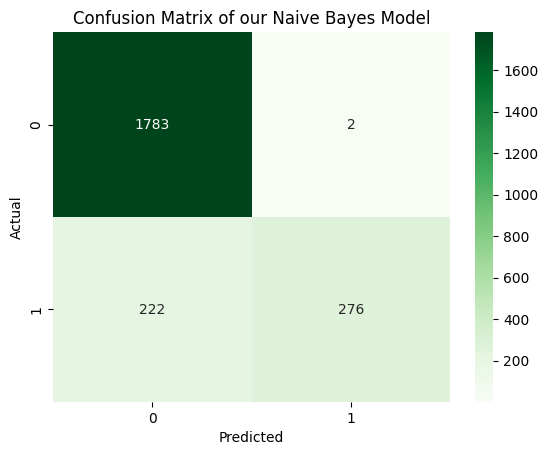

The no. of true positives are: 276 

The no. of true negatives are: 1783 

Sensitivity (True Positive Rate) : 0.5542168674698795
Specificity (True Negative Rate): 0.9988795518207283


In [ ]:
# CONFUSION MATRIX FOR OUR Naive bayes CLASSIFIER MODEL

confusion_nb = confusion_matrix(y_test,y_pred_nb)
# Create a heatmap of the confusion matrix with color mapping
sns.heatmap(confusion_nb, annot=True, fmt='d', cmap='Greens')
# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of our Naive Bayes Model')
# Display the plot
plt.show()
print("The no. of true positives are:", confusion_nb[1,1], "\n")
print("The no. of true negatives are:", confusion_nb[0,0], "\n")
# Calculate true positives, true negatives, false positives, false negatives
tn = confusion_nb[0, 0]
fp = confusion_nb[0, 1]
fn = confusion_nb[1, 0]
tp = confusion_nb[1, 1]

# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

print("Sensitivity (True Positive Rate) :", sensitivity)
print("Specificity (True Negative Rate):", specificity)


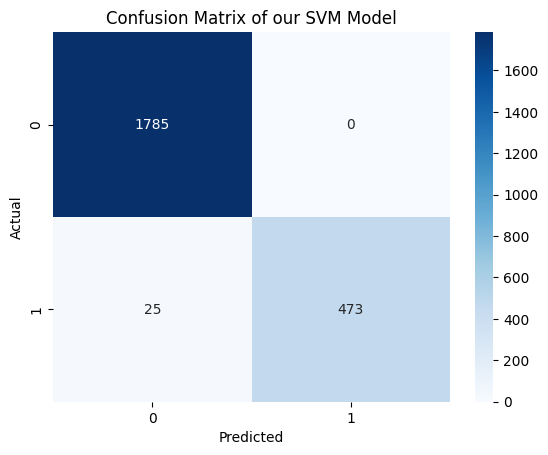

The no. of true positives are: 473 

The no. of true negatives are: 1785 

Sensitivity (True Positive Rate) : 0.9497991967871486
Specificity (True Negative Rate): 1.0


In [ ]:
# CONFUSION MATRIX FOR OUR SVM CLASSIFIER MODEL

confusion_svm = confusion_matrix(y_test,y_pred_svm)
# Create a heatmap of the confusion matrix with color mapping
sns.heatmap(confusion_svm, annot=True, fmt='d', cmap='Blues')
# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of our SVM Model')
# Display the plot
plt.show()
print("The no. of true positives are:", confusion_svm[1,1], "\n")
print("The no. of true negatives are:", confusion_svm[0,0], "\n")
# Calculate true positives, true negatives, false positives, false negatives
tn = confusion_svm[0, 0]
fp = confusion_svm[0, 1]
fn = confusion_svm[1, 0]
tp = confusion_svm[1, 1]

# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

print("Sensitivity (True Positive Rate) :", sensitivity)
print("Specificity (True Negative Rate):", specificity)


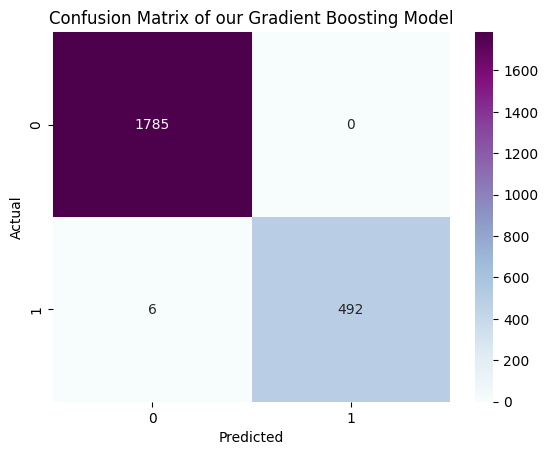

The no. of true positives are: 492 

The no. of true negatives are: 1785 

Sensitivity (True Positive Rate) : 0.9879518072289156
Specificity (True Negative Rate): 1.0


In [ ]:
# CONFUSION MATRIX FOR OUR Gradient Boosting CLASSIFIER MODEL

confusion_gbm = confusion_matrix(y_test,y_pred_gbm)
# Create a heatmap of the confusion matrix with color mapping
sns.heatmap(confusion_gbm, annot=True, fmt='d', cmap='BuPu')
# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of our Gradient Boosting Model')
# Display the plot
plt.show()
print("The no. of true positives are:", confusion_gbm[1,1], "\n")
print("The no. of true negatives are:", confusion_gbm[0,0], "\n")
# Calculate true positives, true negatives, false positives, false negatives
tn = confusion_gbm[0, 0]
fp = confusion_gbm[0, 1]
fn = confusion_gbm[1, 0]
tp = confusion_gbm[1, 1]

# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

print("Sensitivity (True Positive Rate) :", sensitivity)
print("Specificity (True Negative Rate):", specificity)


In [ ]:
# CHECKING THE Precision SCORES OF MODELS

print("THE Precision values OF OUR MODELS:", "\n")
print("Precision of our Logistic Regression model is: ", precision_score(y_test,y_pred_lgr), "\n")
print("Precision of our Decision Tree Classifier is: ", precision_score(y_test,y_pred_dt), "\n")
print("Precision of our Random Forest Classifier is: ", precision_score(y_test,y_pred_rf), "\n")
print("Precision of our Naive Bayes Classifier is: ", precision_score(y_test,y_pred_nb), "\n")
print("Precision of our SVM Classifier is: ", precision_score(y_test,y_pred_svm), "\n")
print("Precision of our Gradient Boosting Classifier is: ", precision_score(y_test,y_pred_gbm), "\n")

THE Precision values OF OUR MODELS: 

Precision of our Logistic Regression model is:  1.0 

Precision of our Decision Tree Classifier is:  0.7779527559055118 

Precision of our Random Forest Classifier is:  0.8561525129982669 

Precision of our Naive Bayes Classifier is:  0.9928057553956835 

Precision of our SVM Classifier is:  1.0 

Precision of our Gradient Boosting Classifier is:  1.0 



In [ ]:
# CHECKING THE RECALL SCORE

print("THE RECALL SCORES OF OUR MODELS", "\n")
print("Recall Score of our Logistic Regression model is: ", recall_score(y_test,y_pred_lgr), "\n")
print("Recall Score of our Decision Tree Classifier is: ", recall_score(y_test,y_pred_dt), "\n")
print("Recall Score of our Random Forest Classifier is: ", recall_score(y_test,y_pred_rf), "\n")
print("Recall Score of our Naive Bayes Classifier is: ", recall_score(y_test,y_pred_nb), "\n")
print("Recall Score of our SVM Classifier is: ", recall_score(y_test,y_pred_svm), "\n")
print("Recall Score of our Gradient Boosting is: ", recall_score(y_test,y_pred_gbm), "\n")


THE RECALL SCORES OF OUR MODELS 

Recall Score of our Logistic Regression model is:  0.8734939759036144 

Recall Score of our Decision Tree Classifier is:  0.9919678714859438 

Recall Score of our Random Forest Classifier is:  0.9919678714859438 

Recall Score of our Naive Bayes Classifier is:  0.5542168674698795 

Recall Score of our SVM Classifier is:  0.9497991967871486 

Recall Score of our Gradient Boosting is:  0.9879518072289156 



In [ ]:
# CHECKING THE F1 SCORES OF MODELS

print("THE F1 SCORES OF OUR MODELS:", "\n")
print("F1 Score of our Logistic Regression model is: ", f1_score(y_test,y_pred_lgr), "\n")
print("F1 Score of our Decision Tree Classifier is: ", f1_score(y_test,y_pred_dt), "\n")
print("F1 Score of our Random Forest Classifier is: ", f1_score(y_test,y_pred_rf), "\n")
print("F1 Score of our Naive Bayes Classifier is: ", f1_score(y_test,y_pred_nb), "\n")
print("F1 Score of our SVM Classifier is: ", f1_score(y_test,y_pred_svm), "\n")
print("F1 Score of our Gradient Boosting Classifier is: ", f1_score(y_test,y_pred_gbm), "\n")


THE F1 SCORES OF OUR MODELS: 

F1 Score of our Logistic Regression model is:  0.932475884244373 

F1 Score of our Decision Tree Classifier is:  0.8720211827007944 

F1 Score of our Random Forest Classifier is:  0.9190697674418605 

F1 Score of our Naive Bayes Classifier is:  0.711340206185567 

F1 Score of our SVM Classifier is:  0.9742533470648815 

F1 Score of our Gradient Boosting Classifier is:  0.993939393939394 



In [ ]:
# CHECKING THE classification report OF MODELS

print("THE classification report OF OUR MODELS:", "\n")
print("classification report of our Logistic Regression model is: \n", classification_report(y_test,y_pred_lgr), "\n")
print("classification report of our Decision Tree Classifier is: \n", classification_report(y_test,y_pred_dt), "\n")
print("classification report of our Random Forest Classifier is: \n", classification_report(y_test,y_pred_rf), "\n")
print("classification report of our Naive Bayes Classifier is: \n", classification_report(y_test,y_pred_nb), "\n")
print("classification report of our SVM Classifier is: \n", classification_report(y_test,y_pred_svm), "\n")
print("classification report of our Gadient Boosting Classifier is: \n", classification_report(y_test,y_pred_gbm), "\n")


THE classification report OF OUR MODELS: 

classification report of our Logistic Regression model is: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1785
           1       1.00      0.87      0.93       498

    accuracy                           0.97      2283
   macro avg       0.98      0.94      0.96      2283
weighted avg       0.97      0.97      0.97      2283
 

classification report of our Decision Tree Classifier is: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      1785
           1       0.78      0.99      0.87       498

    accuracy                           0.94      2283
   macro avg       0.89      0.96      0.91      2283
weighted avg       0.95      0.94      0.94      2283
 

classification report of our Random Forest Classifier is: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      1785
         